# Ebambe-Gruppe

* [Funde](#Funde)
	* [Scherbentypen](#Scherbentypen)
* [Technologische Merkmale (fabrics)](#Technologische-Merkmale-(fabrics))
	* [Brennfarbe](#Brennfarbe)
	* [Oberfläche der Scherben](#Oberfläche-der-Scherben)
	* [Wandungsdicke](#Wandungsdicke)
* Formen
	* [Gefäßformen](#Gefäßformen)
	* [Proportionen](#Proportionen)
	* [Bauchform](#Bauchform)
	* [Mündungs- und Randformen](#Mündungs--und-Randformen)
	* [Bodenformen](#Bodenformen)
* [Verzierungen](#Verzierungselemente)

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sqlite3

import sys, os
sys.path.append("/Python")
from myfunctions import *
from parula import *

style = 'EBA'

con = sqlite3.connect("../data/CongoDB.sqlite")

## Funde

In [19]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Komplex.bef_nr,
           t_Komplex.bef_art,
           t_Ort.ort_fluss,
           t_Obj.GefEinheit AS GE,
           t_Obj.Scherbe,
           t_Obj.Gewicht,
           t_Obj.Anzahl,
           t_Obj.Gr_Clist,
           t_Obj.Typ
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Art) = 'K'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)

# display(df.head())

a = pd.Series({'GE':np.sum(df['Anzahl'].loc[df['Anzahl'] == 1]),
               'Ausgezählt':np.sum(df['Anzahl'].loc[df['Anzahl'] != 1])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,0,Prozent
Ausgezählt,520.0,65.0
GE,280.0,35.0


In [20]:
# nur einzeln aufgenommene GE
df_ge = df.loc[df['Anzahl'] == 1]

In [21]:
np.sum(df['Anzahl'].loc[df['Typ'].str.contains(" ")])

228.0

In [22]:
a = pd.Series({'sicher':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'] == style]),
               'fraglich':np.sum(df_ge['Anzahl'].loc[df_ge['Typ'].str.contains(' ')])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,94.0,34.181818
sicher,181.0,65.818182


In [23]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot

Anzahl  Gewicht
ort_fluss     Ort                      bef_nr                 
Likwala-Esobe Boenja (Fpl. 294)        87/101     1.0     73.0
              Bojenjo (Fpl. 292)       87/101     7.0    139.0
              Botongo (Fpl. 302)       87/101     1.0     20.0
              Botwale (Fpl. 286)       87/101     2.0   1638.0
              Boyenge (Fpl. 284)       87/101     NaN      NaN
              Ebambe (Fpl. 297)        87/101    61.0   4058.0
              Itanga (Fpl. 305)        87/103     3.0    473.0
              Epena (Fpl. 303)          87/101    12.0   1139.4
              Likunda (Fpl. 300)       87/101     8.0   1682.0
              Lokolélé (Fpl. 290)      87/101     2.0     54.0
              Mosenge (Fpl. 299)       87/101    85.0   3574.0
                                       87/102     1.0    815.0
              Mosengi (Fpl. 296)       87/101    28.0   1508.0
              Munda (Fpl. 304)         87/1     391.0  11839.0
                                       87/101    20.0   2577.0
              Ngombe (Fpl. 283)        87/101     9.0    179.0
              Yumba (Fpl. 289)         87/101     6.0    427.0
                                       87/102     5.0    153.0
                                       87/103     6.0    169.0
Ngoko         Mbenja (Fpl. 277)        87/101     2.0     28.0
Sangha        Bokonongo (Fpl. 250)     87/103     2.0    457.0
              Ifondo (Fpl. 253)        87/101     1.0      4.0
              Loboko (Fpl. 248)        87/101     8.0    248.0
              Maboko (Fpl. 267)        87/101     1.0     27.0
              Mai impembe (Fpl. 271)   87/103     1.0     34.0
              Mandombe (Fpl. 259)      87/101     1.0      7.0
              Matoto (Fpl. 264)        87/101     1.0      7.0
              Molanda (Fpl. 258)       87/103     4.0     99.0
              Monjolomba (Fpl. 243)    87/101    11.0    302.0
              Mosanya (Fpl. 262)       87/101     1.0     11.0
              Ouesso (Fpl. 265)        87/101     1.0     11.0
                                       87/102     1.0    108.0
              Pikunda (Fpl. 255)       87/1       2.0     59.0
                                       87/101     7.0    590.0
                                       87/102     1.0   1630.0
                                       87/2      90.0    743.0
                                       87/3       6.0    152.0
              Sangha Fkm 40 (Fpl. 240) 87/040     1.0     11.0
              Sosolo (Fpl. 241)        87/101     5.0     98.0
Ubangi        Bobangi (Fpl. 189)       85/101     1.0     15.0
Zaire/Kongo   Gombe (Fpl. 237)         87/101     4.0     99.0

Anzahl Fundorte:

In [24]:
len(df_pivot.index)

41

In [25]:
# http://pandas.pydata.org/pandas-docs/stable/cookbook.html
df.ix[df['bef_art'].str.contains('Oberfl') == True, 'FEAT'] = 'Survey'
df.ix[~df['bef_art'].str.contains('Oberfl') == True, 'FEAT'] = 'Grabung'
df.ix[df['Typ'] == style, 'SICHERHEIT'] = 'sicher'
df.ix[df['Typ'].str.contains(' '), 'SICHERHEIT'] = 'fraglich'

a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,94.0,34.181818
sicher,181.0,65.818182


In [26]:
df_pivot = df.pivot_table(values='objID', index='Gr_Clist', columns='FEAT', aggfunc=len)
df_pivot['Grabung'] = df_pivot['Grabung'] / df_pivot['Grabung'].sum() * 100
df_pivot['Survey'] = df_pivot['Survey'] / df_pivot['Survey'].sum() * 100
df_pivot

FEAT,Grabung,Survey
Gr_Clist,,
30,22.222222,1.604278
70,51.633987,31.550802
120,16.339869,40.106952
200,6.535948,11.764706
500,0.653595,1.604278
,2.614379,13.368984


In [27]:
df_pivot['Grabung'].plot()
df_pivot['Survey'].plot()
plt.legend()

### nur ausgezählte Stücke

In [28]:
df_a = df.loc[df['Anzahl'] != 1]

df_a.pivot_table(values = 'Anzahl', index = 'Typ', columns = 'Scherbe', aggfunc = np.sum, margins = True)

Scherbe,B,G,R,W,All
Typ,,,,,
EBA,9.0,NaN,7.0,370.0,386.0
EBA (?),NaN,NaN,2.0,93.0,95.0
EBA/BOT (?),NaN,NaN,NaN,11.0,11.0
EBA/EPE (?),NaN,NaN,28.0,NaN,28.0
All,9.0,NaN,37.0,474.0,520.0


In [29]:
df_pivot = df_a.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum, fill_value = '')
df_pivot

Anzahl Gewicht
ort_fluss     Ort                   bef_nr               
Likwala-Esobe Bojenjo (Fpl. 292)    87/101      7     139
              Boyenge (Fpl. 284)    87/101               
              Ebambe (Fpl. 297)     87/101     39    1224
              Mosenge (Fpl. 299)    87/101     55    1117
              Mosengi (Fpl. 296)    87/101     10     128
              Munda (Fpl. 304)      87/1      291    3549
              Ngombe (Fpl. 283)     87/101      8     120
              Yumba (Fpl. 289)      87/102      2      13
                                    87/103      6     169
Sangha        Loboko (Fpl. 248)     87/101      6     150
              Mandombe (Fpl. 259)   87/101               
              Monjolomba (Fpl. 243) 87/101     10     238
              Pikunda (Fpl. 255)    87/2       83     625
Zaire/Kongo   Gombe (Fpl. 237)      87/101      3      69

In [30]:
# Individuelles Scherbengewicht
df['IndivGew'] = df['Gewicht'] / df['Anzahl']
df['IndivGew'].mean()

85.00108495074556

In [31]:
df_pivot = df.pivot_table(values = ['Anzahl', 'Gewicht'], index = ['ort_fluss', 'Ort', 'bef_nr'], aggfunc = np.sum)
df_pivot = pd.DataFrame(df_pivot)

Anzahl Stücke:

In [32]:
np.sum(df_pivot['Anzahl'])

800.0

Gewicht insgesamt in kg:

In [33]:
np.sum(df_pivot['Gewicht']) / 1000

35.257400000000004

## Scherbentypen

In [34]:
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Scherbe', aggfunc = np.sum)
#df_pivot['B'] = 0.
custom_dict = {'G':0,'R':1,'W':3,'B':4}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
G,10.0,1.251564
R,132.0,16.520651
W,626.0,78.347935
B,31.0,3.879850


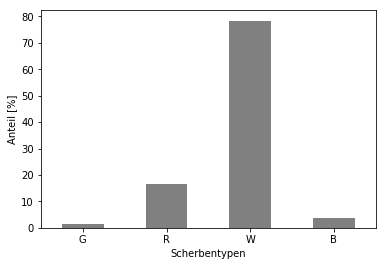

In [35]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Scherbentypen')
plt.ylabel('Anteil [%]')
plt.show()

## Technologische Merkmale (*fabrics*)

In [36]:
sql = """SELECT
           t_Obj.objID,
           't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
           t_Ort.ort_fluss,
           t_Obj.Anzahl,
           t_Obj.MagerungGröße,
           t_Obj.MagerungArt,
           t_Obj.MagerungDichte,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df1 = df.dropna(subset = ['Fabric'])
df1['Fabric'] = df1['Fabric'].map(lambda x: x.rstrip(' (?)'))
df1['Fabric'] = df1['Fabric'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'Anzahl', index = 'Fabric', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


In [37]:
df_pivot.plot(kind = 'barh', legend = False, color = 'Grey')
plt.show()

In [38]:
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
display(df_pivot.head())

,Anzahl,Prozent
Fabric,,
1d,97,29.573171
1b,81,24.695122
1,37,11.280488
1a,32,9.756098
1c,29,8.841463


In [39]:
a = pd.Series({'Typ 1':np.sum(df['Anzahl'].loc[df['Fabric'].str.contains("1|2")]),
               'Nicht-Typ 1':np.sum(df['Anzahl'].loc[~df['Fabric'].str.contains("1|2")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Nicht-Typ 1,19,5.792683
Typ 1,309,94.207317


In [40]:
# Orte mit Ausnahmen:
a = df.loc[~df['Fabric'].str.contains("1|2")]
a.pivot_table(values = 'objID', index = ['ort_fluss', 'Ort'], aggfunc = len)

ort_fluss  Ort                   
Ngoko      Mbenja (Fpl. 277)          1
Sangha     Maboko (Fpl. 267)          1
           Mai impembe (Fpl. 271)     1
           Molanda (Fpl. 258)         3
           Mosanya (Fpl. 262)         1
           Ouesso (Fpl. 265)          1
           Pikunda (Fpl. 255)        11
Name: objID, dtype: int64

In [41]:
df = df.replace('<1','sehr wenig', regex=True)

a = df.loc[df['MagerungDichte'] != ''] # nur Einträgen, bei denen diese Felder ausgefüllt sind
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungDichte', aggfunc = sum)
custom_dict = {'sehr wenig':0,'wenig':1,'mittel':3,'viel':4, 'sehr viel':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
sehr wenig,198,73.880597
wenig,48,17.910448
mittel,8,2.985075
viel,9,3.358209
sehr viel,5,1.865672


In [42]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Anteil nicht-plastische Partikel')
plt.ylabel('Anteil [%]')
plt.show()

In [43]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungGröße', aggfunc = sum)
custom_dict = {'VF':0,'F':1,'M':3,'C':4, 'VC':5}
df_pivot = pd.DataFrame(df_pivot, index=sorted(custom_dict, key=custom_dict.get))
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

,Anzahl,Prozent
VF,177,66.044776
F,40,14.925373
M,31,11.567164
C,15,5.597015
VC,5,1.865672


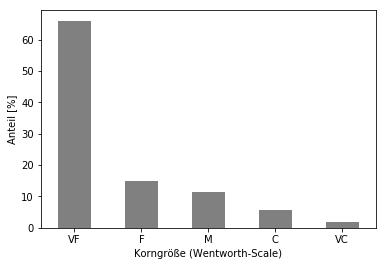

In [44]:
df_pivot.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.xlabel('Korngröße (Wentworth-Scale)')
plt.ylabel('Anteil [%]')
plt.show()

In [45]:
df_pivot = a.pivot_table(values = 'Anzahl', index = 'MagerungArt', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.sort_index(by=['Anzahl'], ascending=[False])
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


,Anzahl,Prozent
MagerungArt,,
S,227,84.701493
S/Org,9,3.358209
S/Org?,9,3.358209
S/Gl,8,2.985075
S/Schamott,3,1.119403
S/Laterit,2,0.746269
Schamott,2,0.746269
,1,0.373134
Laterit (?),1,0.373134


## Brennfarbe

In [46]:
sql = """SELECT
           t_Obj.objID,
           [t_Obj].[Außenfarbe] || '/' || [t_Obj].[Prof_aussen] || '/' || [t_Obj].[Prof_Kern] || '/' || [t_Obj].[Prof_innen] || '/' || [t_Obj].[Innenfarbe] AS Farbe
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Fabric) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')
df = pd.read_sql(sql, con)

a = pd.Series({'Weiß':len(df[df['Farbe'].str.contains("W")].index),
               'Rot':len(df[df['Farbe'].str.contains("R")].index),
               'Sonstig':len(df[~df['Farbe'].str.contains("W|R")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Rot,24,8.000000
Sonstig,74,24.666667
Weiß,202,67.333333


In [47]:
a.plot(y = 'Prozent', kind = 'bar', legend = None, color = 'grey')
plt.xticks(rotation=0)
plt.ylabel('Anteil [%]')
plt.show()

In [48]:
# Sontiges:
a = df[~df['Farbe'].str.contains("W|R")]
pd.Series(' '.join(a['Farbe']).lower().split('/')).value_counts()[:10]

s        94
g        82
bg       64
         58
         12
s s      10
bg bg     8
g s       7
s bg      6
bg s      6
dtype: int64

### Oberfläche der Scherben

In [49]:
sql = """SELECT
           t_Obj.objID,
           t_Obj.Anzahl,
           t_Obj.Obfl,
           t_Obj.Fabric
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Anzahl'] = df['Anzahl'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Anzahl', index = 'Obfl', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['Anzahl']/df_pivot['Anzahl'].sum()*100
df_pivot

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Anzahl,Prozent
Obfl,,
außen glatt,1,0.370370
glatt,252,93.333333
glatt/leicht rau,1,0.370370
glatt/verrundet,1,0.370370
leicht rau,13,4.814815
mittel,1,0.370370
rau,1,0.370370


### Wandungsdicke

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\Dirk\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


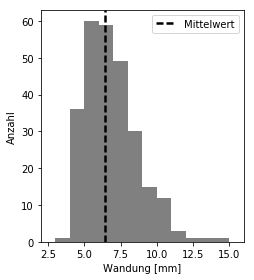

In [50]:
sql = """SELECT
           t_Obj.objID,
           t_obj.Form_Gef,
           t_Obj.Wandung 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Obj.Obfl) != '')
           AND ((t_Obj.Typ) LIKE '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df['Wandung'] = df['Wandung'].convert_objects(convert_numeric=True)

# Spannweite ermitteln und als bins nutzen
bins = df['Wandung'].max() - df['Wandung'].min()

mean = df['Wandung'].mean()

ax = df['Wandung'].hist(bins = bins, color = 'grey', histtype='stepfilled')
plt.axvline(mean, color = 'black', ls = 'dashed', lw = 2.5)
#plt.gca().set_aspect(.25)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1]) - 2) / (abs(ylim[0]) + abs(ylim[1])))
plt.xlabel("Wandung [mm]")
plt.ylabel("Anzahl")
plt.xlim([df['Wandung'].min()-1,df['Wandung'].max()+1])
legend = plt.legend(["Mittelwert"])
legend.get_frame().set_facecolor('white')
plt.tight_layout()
ax.xaxis.grid(False)
ax.yaxis.grid(False)
#plt.savefig('../output/figs/3-1-2-1_PIKMUN_Wanddicke_insg.pdf', bbox_inches='tight')
plt.show()

In [51]:
df['Wandung'].describe()

count    268.000000
mean       6.388060
std        1.845778
min        3.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       15.000000
Name: Wandung, dtype: float64

In [52]:
df['Wandung'].var()

3.406898093800668

## Gefäßformen

In [53]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

In [54]:
df_pivot = df.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)

df_pivot['GefForm'] = df_pivot.index
a = pd.Series({'sicher':sum(df_pivot['objID'].loc[~df_pivot['GefForm'].str.contains(" ")]),
               'fraglich':sum(df_pivot['objID'].loc[df_pivot['GefForm'].str.contains(" ")])})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
fraglich,77,37.931034
sicher,126,62.068966


In [55]:
a[0].sum()

203

In [56]:
# nur sichere Gef
df1 = df.loc[~df['Form_Gef'].str.contains(" ")]
# fragliche Gef
df2 = df.loc[df['Form_Gef'].str.contains(" ")]

In [57]:
df_pivot1 = df1.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot1 = pd.DataFrame(df_pivot1)

df_pivot2 = df2.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot2 = pd.DataFrame(df_pivot2)

In [58]:
# mit .isin nur noch solche Einträge auswählen, die sicher 'Pikunda-Munda' sind (ohne ? oder anderen Kram)
dfFilter = [style]
df1 = df1[df1['Typ'].isin(dfFilter)]
# display(df1.head())
# display(df1.head())

In [59]:
df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Gef', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# df_pivot

In [60]:
df_pivot['objID'].sum()

103

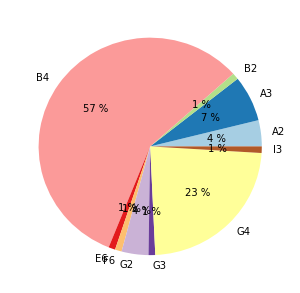

In [61]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')
plt.savefig('../output/figs/3-1-2-5_Ebambe_GefForm2.pdf', bbox_inches='tight')

### Mündungs- und Randformen

In [62]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Mdg,
           t_Obj.Form_Rand,
           t_Obj.Form_Hals,
           t_Obj.Form_Schulter,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
# leere Werte in NaN ändern
df = df.replace('',np.nan, regex=True)
# display(df.head())

In [63]:
# Zeilen ohne Mdg löschen
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Mdg'])
df1['Form_Mdg'] = df1['Form_Mdg'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Mdg'] = df1['Form_Mdg'].apply(lambda x: x.split('/')[0])\

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Mdg', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot.head()

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Mdg,,
M3,72,69.230769
M6,15,14.423077
M2,6,5.769231
M4,5,4.807692
M5,5,4.807692


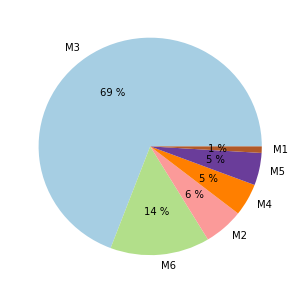

In [64]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [65]:
# Fragezeichen löschen
df1 = df.dropna(subset = ['Form_Rand'])
df1['Form_Rand'] = df1['Form_Rand'].map(lambda x: x.rstrip(' (?)'))
df1['Form_Rand'] = df1['Form_Rand'].apply(lambda x: x.split('/')[0])

df_pivot = df1.pivot_table(values = 'objID', index = 'Form_Rand', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending=False)
# Prozent-Anteil errechnen
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
display(df_pivot.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


,objID,Prozent
Form_Rand,,
B1,55,45.833333
A1,41,34.166667
B3.3,11,9.166667
B1.1,4,3.333333
A1.1,3,2.500000


In [66]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.ylabel('')

In [67]:
a = df.dropna(subset = ['Form_Hals'])
a['Form_Hals'] = a['Form_Hals'].map(lambda x: str(x)[:2])

df_pivot = a.pivot_table(values = 'objID', index = 'Form_Hals', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Hals")

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [68]:
b = df.dropna(subset = ['Form_Schulter'])
b['Form_Schulter'] = b['Form_Schulter'].map(lambda x: str(x)[:2])

df_pivot = b.pivot_table(values = 'objID', index = 'Form_Schulter', aggfunc = len)
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot.plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Schulter")

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Boden

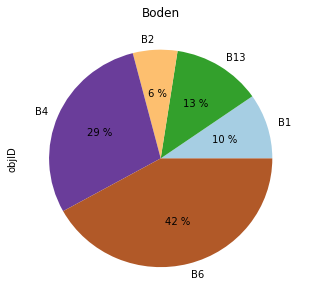

In [69]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Ort.ort_name,
           t_Obj.objID,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit)='DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%')
           AND ((t_Obj.Anzahl) = 1)
           AND ((t_Obj.Form_Boden) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)

# Fragezeichen löschen
df['Form_Boden'] = df['Form_Boden'].map(lambda x: x.rstrip(' (?)'))
df['Form_Boden'] = df['Form_Boden'].apply(lambda x: x.split('/')[0])\

df_pivot = df.pivot_table(values = 'objID', index = 'Form_Boden', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
#df_pivot

fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired')
plt.title("Boden")

In [70]:
len(df['Form_Boden'])

31

## Verzierungselemente

In [2]:
(df_pivotBig_perc, df_pivotBig_perc_a, new_cmap) = decoration_positon_matrices_print(style)

C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df1['n'] = 1
C:\Users\Dirk\Dropbox\Dissertation\Python\myfunctions.py:88: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  ab[1] = ab[1].convert_objects(convert_numeric=True)


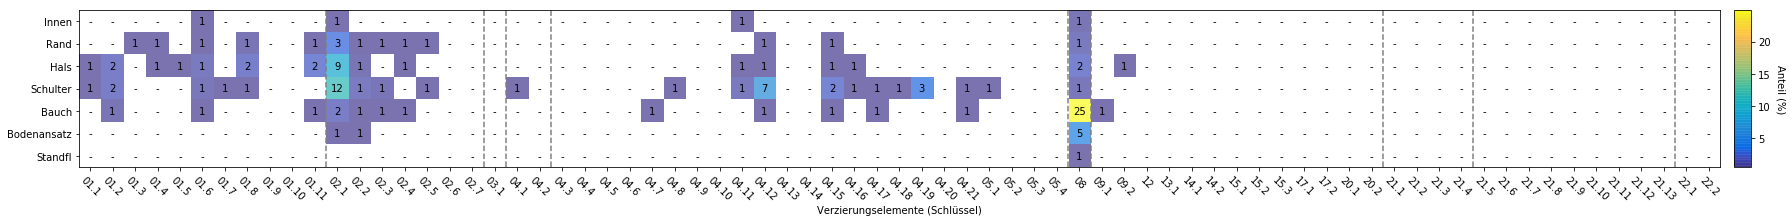

In [3]:
fig = plt.figure()
fig.set_size_inches(25, 15)

ax = plt.gca()
im = ax.imshow(df_pivotBig_perc, interpolation='nearest', cmap=parula_map, alpha=.66)

plt.xlabel('Verzierungselemente (Schlüssel)')
plt.yticks(range(len(df_pivotBig_perc.index)), df_pivotBig_perc.index.str[2:])
plt.xticks(range(len(df_pivotBig_perc.columns)), df_pivotBig_perc.columns, rotation = -45)

for (i, j), z in np.ndenumerate(df_pivotBig_perc_a):
    plt.text(j, i, z, ha='center', va='center')
    
plt.axvline(10.5, color='grey', linestyle = '--')
plt.axvline(17.5, color='grey', linestyle = '--')
plt.axvline(18.5, color='grey', linestyle = '--')
plt.axvline(20.5, color='grey', linestyle = '--')
plt.axvline(43.5, color='grey', linestyle = '--')
plt.axvline(44.5, color='grey', linestyle = '--')
plt.axvline(57.5, color='grey', linestyle = '--')
plt.axvline(61.5, color='grey', linestyle = '--')
plt.axvline(70.5, color='grey', linestyle = '--')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.2)
cbar = plt.colorbar(im, cax=cax)
cbar.set_label('Anteil (%)', rotation = -90, labelpad = 15)

plt.tight_layout()

plt.savefig('../output/figs/3-1-2-5_Ebambe_VerzierungselmenteAlle.pdf', bbox_inches='tight')
plt.show()

In [73]:
sql = """SELECT
           t_Obj.objID,
           t_K_Pos.posID,
           t_K_Verz.verzID,
           [t_K_Pos].[posReihe] || ' ' || [posName] AS pos,
           t_K_Verz.verzName,
           t_K_Verz.verzBeschr,
           t_Obj.Typ,
           t_Obj.Form_Gef
       FROM t_Obj INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
           INNER JOIN t_K_Pos ON "t_ObjPosVerz".posID = t_K_Pos.posID
           INNER JOIN t_K_Verz ON "t_ObjPosVerz".verzID = t_K_Verz.verzID
       WHERE (((t_K_Pos.posID)<>1)
           AND ((t_K_Verz.verzName) != '')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
#display(df.head())

df_pivot = df.pivot_table(values = 'objID', index = 'verzName', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
# Sortierung in Aufsteigend ändern
df_pivot = df_pivot.sort_index(by = ['objID'], ascending = True)

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


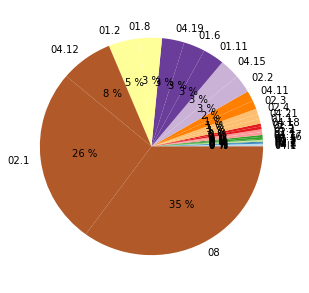

In [74]:
fig = plt.figure()
fig.set_size_inches(5, 5)
df_pivot['objID'].plot(kind='pie', autopct='%.0f %%', cmap = 'Paired' )
plt.ylabel('')

In [75]:
a = pd.Series({'Riefen und Rillen':len(df.loc[df['verzName'].str.contains("01.|02.")].index),
               'Sonstiges':len(df.loc[~df['verzName'].str.contains("01.|02.")].index)})
a = pd.DataFrame(a)
a['Prozent'] = a[0]/a[0].sum()*100
a

,0,Prozent
Riefen und Rillen,333,46.835443
Sonstiges,378,53.164557


## Datierung

In [76]:
sql = """SELECT
           t_Obj.objID,
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM ((t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Komplex.bef_art) Not Like '%oberfl%')
           AND ((t_Obj.Typ) = '"""+style+"""'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df_pivot = pd.DataFrame(df.pivot_table(values = 'objID', index = ['LABNR', 'C14AGE', 'C14STD', 'C13', 'SITE', 'CULTURE', 'PHASE', 'LATITUDE', 'LONGITUDE'], aggfunc = len)).reset_index()
df_pivot

,LABNR,C14AGE,C14STD,C13,SITE,CULTURE,PHASE,LATITUDE,LONGITUDE,objID
0,KI-2882,1110.0,110.0,-27.7,Munda,Grube/Ofen,87/1,1.162608,17.356948,75
1,KI-2883,870.0,180.0,-28.2,Munda,Grube/Ofen,87/1,1.162608,17.356948,75
2,KI-2884,250.0,40.0,-27.0,Munda,Grube/Ofen,87/1,1.162608,17.356948,75
3,KI-2892,840.0,41.0,-27.4,Pikunda,Ofen,87/3,0.549344,16.635736,1


OxCal

In [77]:
print('''Plot()
{''')
for index, row in df_pivot.iterrows():
#for index, row in df_merge[df_merge['PHASE'] == 'Group VI'].iterrows():
    print('R_Date("',row['SITE'], '-', row['PHASE'],'-', row['LABNR'],'",', row['C14AGE'],',', row['C14STD'],');')
print('};')

Plot()
{
R_Date(" Munda - 87/1 - KI-2882 ", 1110.0 , 110.0 );
R_Date(" Munda - 87/1 - KI-2883 ", 870.0 , 180.0 );
R_Date(" Munda - 87/1 - KI-2884 ", 250.0 , 40.0 );
R_Date(" Pikunda - 87/3 - KI-2892 ", 840.0 , 41.0 );
};


## Verbreitung

In [78]:
df = style_mapping_gis_export(style)
df.sort_values(['Kat-Nr'])

Typ,Ort,Kat-Nr,X,Y,TYP
0,Bobangi (Fpl. 189),189,17.722248,-0.108898,EBA (?)
8,Gombe (Fpl. 237),237,17.580406,-0.704069,EBA (?)
19,Sangha Fkm 40 (Fpl. 240),240,16.932954,-1.045511,EBA
30,Sosolo (Fpl. 241),241,17.128605,-0.892241,EBA (?)
12,Monjolomba (Fpl. 243),243,17.174576,-0.684421,EBA
8,Loboko (Fpl. 248),248,17.130913,-0.109189,EBA
2,Bokonongo (Fpl. 250),250,17.129437,0.201971,EBA
9,Ifondo (Fpl. 253),253,16.908795,0.481301,EBA (?)
18,Pikunda (Fpl. 255),255,16.635736,0.549344,EBA
20,Molanda (Fpl. 258),258,16.537896,0.945646,EBA (?)


In [79]:
df.to_csv("../data/processed/3-1-2-5_EBA_Verbreitung.csv", index = False)

In [80]:
len(df)

32

In [81]:
sql = """SELECT
       t_Obj.objID,
       't_Ort'.'Kat-Nr',
       't_Ort'.'ort_name' || ' (Fpl. ' || 't_ort'.'Kat-Nr' || ')' AS Ort,
       t_Obj.Typ,
       t_Ort.ort_fluss,
       t_Ort.y_lat AS Y, 
       t_Ort.x_long AS X
   FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
       INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
   WHERE (((t_Ort.ort_lit) = 'DS')
       AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

df_pivot = df.pivot_table(values = 'objID', index = 'ort_fluss', aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot['Prozent'] = df_pivot['objID']/df_pivot['objID'].sum()*100
df_pivot

,objID,Prozent
ort_fluss,,
Likwala-Esobe,279,80.869565
Ngoko,2,0.579710
Sangha,61,17.681159
Ubangi,1,0.289855
Zaire/Kongo,2,0.579710


In [82]:
df_pivot = df.pivot_table(values = 'objID', index = ['ort_fluss', 'Ort'], aggfunc = len)
df_pivot = pd.DataFrame(df_pivot)
df_pivot = df_pivot.reset_index()
# Anzahl Orte an Fluss
df_pivot1 = df_pivot.pivot_table(values = 'Ort', index = 'ort_fluss', aggfunc = len)
df_pivot1

ort_fluss
Likwala-Esobe    15
Ngoko             1
Sangha           14
Ubangi            1
Zaire/Kongo       1
Name: Ort, dtype: int64

In [83]:
sql = """SELECT
       t_Obj.Anzahl,
       't_ort'.'Kat-Nr',
       t_Obj.Typ,
       t_Ort.ort_fluss
   FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
       INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
   WHERE (((t_Ort.ort_lit) = 'DS')
       AND ((t_Obj.Anzahl != ''))
       AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

a = pd.read_sql(sql, con)

sql = """SELECT
       t_Obj.Anzahl,
       't_ort'.'Kat-Nr',
       t_Obj.Typ,
       t_Ort.ort_fluss
   FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
       INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
   WHERE (((t_Ort.ort_lit) = 'DS')
       AND ((t_Obj.Anzahl != ''))
       AND ((t_Obj.Typ) Not Like '%"""+style+"""%'))""".replace('\n',' ')

b = pd.read_sql(sql, con)

In [84]:
# Funde der EBA-Gruppe
a1 = a.pivot_table(values = 'Anzahl', index = ['ort_fluss', 'Kat-Nr'], aggfunc = np.sum)
a1 = pd.DataFrame(a1)
a1 = a1.reset_index()
a1 = a1.rename(columns={'Anzahl':'EBA'})

# Funde nicht EBA-Gruppe
b1 = b.pivot_table(values = 'Anzahl', index = ['ort_fluss', 'Kat-Nr'], aggfunc = sum)
b1 = pd.DataFrame(b1)
b1 = b1.reset_index()
b1 = b1.rename(columns={'Anzahl':'notEBA'})

m = pd.merge(left=a1, right=b1, on='Kat-Nr', how='left')

m['pct'] = m['EBA'] / ( m['EBA'] + m['notEBA'] ) * 100

# mittlere Prozentanteil Funde EBA an Fpl. mit EBA in Bezug auf Gesamtinventar der jeweiligen Fpl
m.pivot_table(values = 'pct', index = 'ort_fluss_x', aggfunc = np.mean)

ort_fluss_x
Likwala-Esobe    25.536856
Ngoko            18.181818
Sangha           15.338494
Ubangi            4.166667
Zaire/Kongo      11.111111
Name: pct, dtype: float64

## Tafeln

In [85]:
sql = """SELECT
           t_Ort.ort_kurz AS SITE,
           t_Komplex.bef_nr AS FEAT,
           t_Obj.Individuum AS IND,
           t_Obj.Typ,
           t_Obj.Form_Gef,
           t_Obj.Form_Rand,
           t_Obj.Form_Boden
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_lit) = 'DS')
           AND ((t_Obj.Typ) Like '%"""+style+"""%'))""".replace('\n',' ')

df = pd.read_sql(sql, con)

pl = pd.read_csv('../plates/plates.csv')

df_merge = pd.merge(pl, df, on=['SITE', 'FEAT', 'IND'], how='inner')
df_merge

,TAF,OBJ,SITE,FEAT,NOTE,IND,Typ,Form_Gef,Form_Rand,Form_Boden
0,38,8,SSL,87/101,NaN,85,EBA (?),A2/A3 (?),None,None
1,41,12,BOG,87/103,NaN,6,EBA (?),None,None,None
2,49,10,PIK,87/2,NaN,-1:40,EBA,B4,None,None
3,49,12,PIK,87/2,NaN,-1:247,EBA,None,None,None
4,49,16,PIK,87/3,NaN,/I:1-2,EBA,B4/D1 (?),None,None
5,54,15,PIK,87/101,NaN,87,EBA/BDG (?),C2,B1/B2,None
6,55,4,PIK,87/101,NaN,26,EBA/BDG (?),C2 (?),None,None
7,55,5,PIK,87/101,NaN,"236, 245",EBA,B2 (?),None,None
8,55,6,PIK,87/101,NaN,140,EBA,B4,None,None
9,55,8,PIK,87/101,NaN,156,EBA (?),None,None,None
